In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [552]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,Oct-95,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,Feb-95,1995,24900,191,260,Manual,Petrol,NaN,#NAME?,190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,Feb-95,1995,5900,110,150,Unknown,Petrol,NaN,#NAME?,129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,Jul-95,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,Nov-96,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",#NAME?,96127.0,"3.0i Super V6, absoluter Topzustand !"


In [553]:
df.shape

(251079, 15)

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [555]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('registration_date', inplace=True, axis=1)
df.drop('power_kw', inplace=True, axis=1)
df.drop('offer_description', inplace=True, axis=1)

In [556]:
pd.unique(df['brand'])

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [557]:
df['brand'].replace('-', '', inplace=True, regex=True)
df['model'].replace(' ', '', inplace=True, regex=True)
df['model'].replace('-', '', inplace=True, regex=True)
df['brand'] = df['brand'].apply(str.upper)
df['model'] = df['model'].apply(str.upper)

In [558]:
for index, row in df.iterrows():
    brand = row['brand']
    model = row['model']
    new_model = model.replace(brand, '')
    df.at[index, 'model'] = new_model
df['model'].replace('', np.nan, inplace=True, regex=True)
df.dropna(inplace=True)
df.tail()

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
251071,VOLVO,XC60,silver,2023,81350,310,Automatic,Hybrid,"7,4 l/100 km",167 g/km,60.0
251072,VOLVO,XC60,silver,2023,55400,197,Automatic,Diesel,"5,6 l/100 km",142 g/km,5000.0
251073,VOLVO,XC60,silver,2023,54500,197,Automatic,Diesel,"5,6 l/100 km",142 g/km,5900.0
251075,VOLVO,XC90,white,2023,89690,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0
251076,VOLVO,V60,white,2023,61521,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0


In [559]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')
df['year'] = df['year'].dt.year
df.dropna(inplace=True)

In [560]:
df['transmission_type'].replace('Unknown', np.nan, inplace=True, regex=True)
df.dropna(inplace=True)

In [561]:
df['fuel_type'].replace('Unknown', np.nan, inplace=True, regex=True)
aux = df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_g_km'].tolist()
df.loc[df['fuel_type'] == 'Electric', 'electric_range'] = aux
df.drop('fuel_consumption_g_km', inplace=True, axis=1)
df.loc[df['fuel_type'] == 'Electric', 'fuel_consumption_l_100km'] = 0
df.loc[df['fuel_type'] != 'Electric', 'electric_range'] = 0
df['fuel_type'].replace('Other', np.nan, inplace=True, regex=True)
df['fuel_type'].replace('Hydrogen', np.nan, inplace=True, regex=True)
df['fuel_type'].replace('Ethanol', np.nan, inplace=True, regex=True)
df.dropna(inplace=True)

In [562]:
df['fuel_consumption_l_100km'].replace('-', '', inplace=True, regex=True)
df['fuel_consumption_l_100km'].replace(' ', '', inplace=True, regex=True)
df['fuel_consumption_l_100km'].replace('kg/100km', '', inplace=True, regex=True)
df['fuel_consumption_l_100km'].replace('l/100km', '', inplace=True, regex=True)
df['fuel_consumption_l_100km'].replace('\(\)', np.nan, inplace=True, regex=True)
df['fuel_consumption_l_100km'].replace('kWh/100km', 'zzz', inplace=True, regex=True)
df['fuel_consumption_l_100km'].replace('km\(Ort\)', 'zzz', inplace=True, regex=True)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(str)
df = df[df['fuel_consumption_l_100km'].str.contains('zzz') == False]
df['fuel_consumption_l_100km'].replace(',', '.', inplace=True, regex=True)
df.dropna(inplace=True)
df = df.copy()

In [563]:
df['electric_range'].replace(' ', '', inplace=True, regex=True)
df['electric_range'].replace('kmReichweite', '', inplace=True, regex=True)
df['electric_range'].replace('g/km', 'zzz', inplace=True, regex=True)
df = df.drop(df[(df['fuel_type'] == 'Electric') & (df['electric_range'].str.contains('zzz') == True)].index)

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221549 entries, 0 to 251076
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     221549 non-null  object 
 1   model                     221549 non-null  object 
 2   color                     221549 non-null  object 
 3   year                      221549 non-null  float64
 4   price_in_euro             221549 non-null  object 
 5   power_ps                  221549 non-null  object 
 6   transmission_type         221549 non-null  object 
 7   fuel_type                 221549 non-null  object 
 8   fuel_consumption_l_100km  221549 non-null  object 
 9   mileage_in_km             221549 non-null  float64
 10  electric_range            221549 non-null  object 
dtypes: float64(2), object(9)
memory usage: 20.3+ MB


In [565]:
df['price_in_euro'] = df['price_in_euro'].astype(float)
df['power_ps'] = df['power_ps'].astype(float)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(float)
df['electric_range'] = df['electric_range'].astype(float)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220469 entries, 0 to 251076
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     220469 non-null  object 
 1   model                     220469 non-null  object 
 2   color                     220469 non-null  object 
 3   year                      220469 non-null  float64
 4   price_in_euro             220469 non-null  float64
 5   power_ps                  220469 non-null  float64
 6   transmission_type         220469 non-null  object 
 7   fuel_type                 220469 non-null  object 
 8   fuel_consumption_l_100km  220469 non-null  float64
 9   mileage_in_km             220469 non-null  float64
 10  electric_range            220469 non-null  float64
dtypes: float64(6), object(5)
memory usage: 20.2+ MB


In [566]:
df = df.drop(df[(df['fuel_type'] == 'Electric') & (df['electric_range'] == 0)].index)
df = df.drop(df[~df['fuel_type'].isin(['Electric', 'Hybrid', 'Diesel Hybrid']) & (df['fuel_consumption_l_100km'] <= 1)].index)
df = df.drop(df[df['fuel_type'].isin(['Hybrid', 'Diesel Hybrid']) & (df['fuel_consumption_l_100km'] == 0)].index)

In [567]:
df.reset_index(inplace=True, drop=True)

In [568]:
df.to_csv('new.csv')

In [569]:
df.head()

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,electric_range
0,ALFAROMEO,GTV,red,1995.0,1300.0,201.0,Manual,Petrol,10.9,160500.0,0.0
1,ALFAROMEO,SPIDER,black,1995.0,4900.0,150.0,Manual,Petrol,9.5,189500.0,0.0
2,ALFAROMEO,164,red,1996.0,17950.0,179.0,Manual,Petrol,7.2,96127.0,0.0
3,ALFAROMEO,SPIDER,red,1996.0,7900.0,150.0,Manual,Petrol,9.5,47307.0,0.0
4,ALFAROMEO,145,red,1996.0,3500.0,150.0,Manual,Petrol,8.8,230000.0,0.0


In [570]:
df.shape

(220403, 11)

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220403 entries, 0 to 220402
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     220403 non-null  object 
 1   model                     220403 non-null  object 
 2   color                     220403 non-null  object 
 3   year                      220403 non-null  float64
 4   price_in_euro             220403 non-null  float64
 5   power_ps                  220403 non-null  float64
 6   transmission_type         220403 non-null  object 
 7   fuel_type                 220403 non-null  object 
 8   fuel_consumption_l_100km  220403 non-null  float64
 9   mileage_in_km             220403 non-null  float64
 10  electric_range            220403 non-null  float64
dtypes: float64(6), object(5)
memory usage: 18.5+ MB


In [572]:
df[['brand', 'model', 'color', 'transmission_type', 'fuel_type']].describe(include='all')

,brand,model,color,transmission_type,fuel_type
count,220403,220403,220403,220403,220403
unique,47,1165,14,3,7
top,VOLKSWAGEN,GOLF,black,Automatic,Petrol
freq,30009,6928,52245,112646,130052


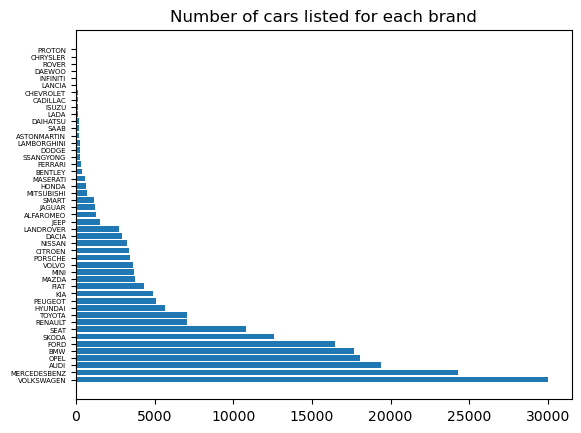

In [573]:
offer = df['brand'].value_counts()
plt.barh(offer.index, offer.values)
plt.yticks(fontsize=5)
plt.title('Number of cars listed for each brand')
plt.show()

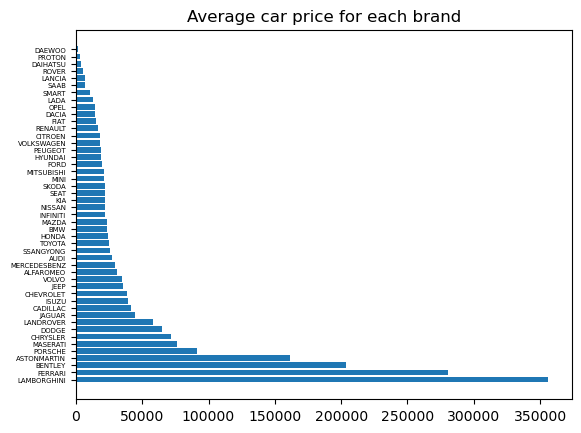

In [574]:
average = df[['brand', 'price_in_euro']].groupby('brand').mean().sort_values(by='price_in_euro', ascending=False)
plt.barh(average.index, average.price_in_euro)
plt.yticks(fontsize=5)
plt.title('Average car price for each brand')
plt.show()

In [575]:
df.describe()

,year,price_in_euro,power_ps,fuel_consumption_l_100km,mileage_in_km,electric_range
count,220403.000000,2.204030e+05,220403.000000,220403.000000,2.204030e+05,220403.000000
mean,2016.104441,2.501525e+04,168.976516,6.080122,8.790944e+04,0.501599
std,5.441648,3.149883e+04,93.725653,2.591899,7.918609e+04,13.592062
min,1995.000000,1.200000e+02,5.000000,0.000000,0.000000e+00,0.000000
25%,2013.000000,1.160000e+04,110.000000,4.900000,2.701200e+04,0.000000
50%,2017.000000,1.919000e+04,150.000000,5.700000,7.100000e+04,0.000000
75%,2020.000000,2.899000e+04,190.000000,6.800000,1.300000e+05,0.000000
max,2023.000000,2.490000e+06,999.000000,173.000000,3.800000e+06,615.000000


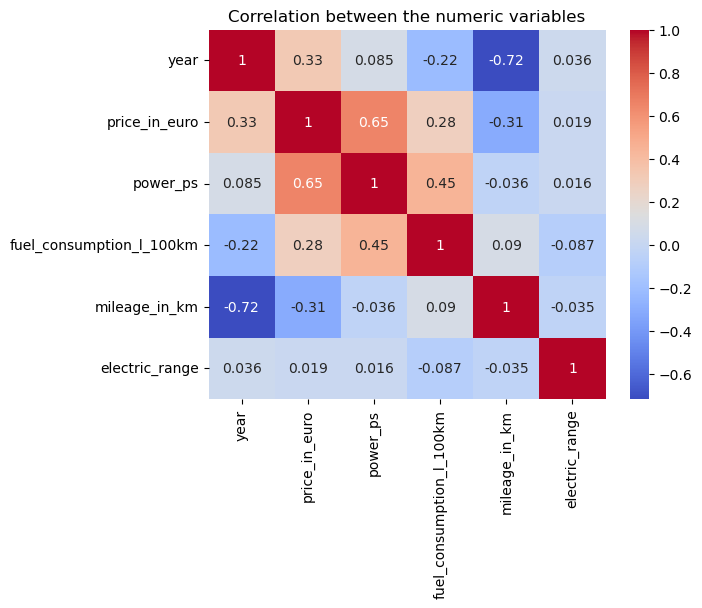

In [576]:
correlation_matrix = df[['year', 'price_in_euro', 'power_ps', 'fuel_consumption_l_100km', 'mileage_in_km', 'electric_range']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between the numeric variables')
plt.show()

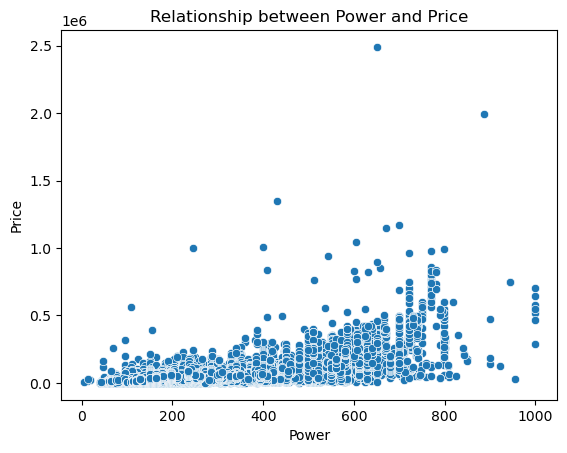

In [577]:
sns.scatterplot(data=df, x='power_ps', y='price_in_euro')
plt.title('Relationship between Power and Price')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

In [578]:
for variable in df:
    if df[variable].dtype == 'float64':
        df[variable] = (df[variable]-df[variable].min())/(df[variable].max()-df[variable].min())

In [579]:
dummy = pd.get_dummies(df)
df = pd.concat([df, dummy], axis=1)
df.drop(['brand', 'model', 'color', 'transmission_type', 'fuel_type'], inplace=True, axis=1)
df.head()

,year,price_in_euro,power_ps,fuel_consumption_l_100km,mileage_in_km,electric_range,year,price_in_euro,power_ps,fuel_consumption_l_100km,...,transmission_type_Automatic,transmission_type_Manual,transmission_type_Semi-automatic,fuel_type_CNG,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Hybrid,fuel_type_LPG,fuel_type_Petrol
0,0.000000,0.000474,0.197183,0.063006,0.042237,0.0,0.000000,0.000474,0.197183,0.063006,...,0,1,0,0,0,0,0,0,0,1
1,0.000000,0.001920,0.145875,0.054913,0.049868,0.0,0.000000,0.001920,0.145875,0.054913,...,0,1,0,0,0,0,0,0,0,1
2,0.035714,0.007161,0.175050,0.041618,0.025297,0.0,0.035714,0.007161,0.175050,0.041618,...,0,1,0,0,0,0,0,0,0,1
3,0.035714,0.003125,0.145875,0.054913,0.012449,0.0,0.035714,0.003125,0.145875,0.054913,...,0,1,0,0,0,0,0,0,0,1
4,0.035714,0.001357,0.145875,0.050867,0.060526,0.0,0.035714,0.001357,0.145875,0.050867,...,0,1,0,0,0,0,0,0,0,1


In [580]:
lista = []
for column_header in df.columns:
    lista.append(column_header)
lista.remove('price_in_euro')

In [581]:
x = df[lista]
y = df['price_in_euro']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [582]:
model = LinearRegression()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('mse:', mse, 'r2:', r2)

mse: 2.256734506648054e-09 r2: 0.9999869264884126


In [583]:
model.coef_

array([[ 0.01920994,  0.06687416, -0.05543275, ..., -0.02340654,
        -0.02340654, -0.02340654],
       [ 0.01920994,  0.06687416, -0.05543275, ..., -0.02340654,
        -0.02340654, -0.02340654]])